# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/ML Tugbes"

In [ ]:
%cd /content/drive/MyDrive/ML Tugbes

/content/drive/MyDrive/ML Tugbes


In [ ]:
!ls

Animals10_CNN_Callback.h5  animals10.zip  model-elefante  raw-img
Animals10_CNN.h5	   kaggle.json	  model-raw-img   translate.py


# **Augmentasi**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             width_shift_range =1,
                             height_shift_range = 1,
                             shear_range = 0.2,
                             fill_mode = 'nearest')

In [ ]:
target_size = (100,100)
batch_size = 32

train = '/content/drive/MyDrive/ML Tugbes/model-raw-img/training'
train_generator = datagen.flow_from_directory(train,
                                                batch_size = batch_size,
                                                target_size = target_size,
                                                color_mode = 'rgb',
                                                shuffle = False,
                                                class_mode = 'categorical')

validation = '/content/drive/MyDrive/ML Tugbes/model-raw-img/validation'
validation_generator = datagen.flow_from_directory(validation,
                                                batch_size = batch_size,
                                                target_size = target_size,
                                                color_mode = 'rgb',
                                                shuffle = False,
                                                class_mode = 'categorical')

Found 19633 images belonging to 10 classes.
Found 6545 images belonging to 10 classes.


# **Modelling**

In [ ]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm as tq
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB0
from google.colab import files
from keras.preprocessing import image

In [ ]:
model_tf = VGG16(include_top=False, input_tensor=Input(shape=(100,100,3)))
model_tf.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model_tf.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
# Feature Extraction Layer
model = Sequential()
model.add(model_tf)
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 3, 3, 512)         0         
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 15,305,930
Trainable params: 591,242
Non-trainable params: 14,714,688
_________________________________________________________________
None


# **VGG-16 (lr = 0,001) tanpa callback**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit(
    train_generator, 
    epochs=70, 
    validation_data = validation_generator
    )

Epoch 1/70
614/614 [==============================] - 3995s 6s/step - loss: 1.9009 - acc: 0.3467 - val_loss: 1.5406 - val_acc: 0.4697
Epoch 2/70
614/614 [==============================] - 280s 456ms/step - loss: 1.3761 - acc: 0.5175 - val_loss: 1.1516 - val_acc: 0.6079
Epoch 3/70
614/614 [==============================] - 271s 442ms/step - loss: 1.1985 - acc: 0.5808 - val_loss: 1.1538 - val_acc: 0.6002
Epoch 4/70
614/614 [==============================] - 269s 438ms/step - loss: 1.0906 - acc: 0.6250 - val_loss: 1.0314 - val_acc: 0.6504
Epoch 5/70
614/614 [==============================] - 267s 435ms/step - loss: 1.0365 - acc: 0.6457 - val_loss: 1.0148 - val_acc: 0.6529
Epoch 6/70
614/614 [==============================] - 270s 441ms/step - loss: 0.9959 - acc: 0.6613 - val_loss: 0.9786 - val_acc: 0.6669
Epoch 7/70
614/614 [==============================] - 265s 432ms/step - loss: 0.9647 - acc: 0.6685 - val_loss: 1.0658 - val_acc: 0.6345
Epoch 8/70
614/614 [==============================

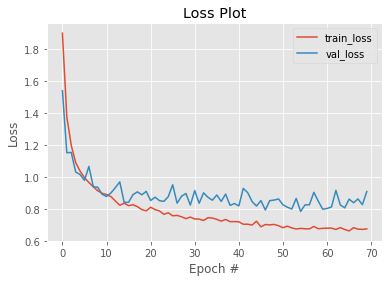

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 70), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 70), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

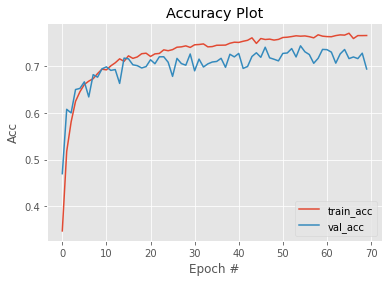

In [ ]:
plt.figure()
plt.plot(np.arange(0, 70), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 70), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Accuracy: 69.52%


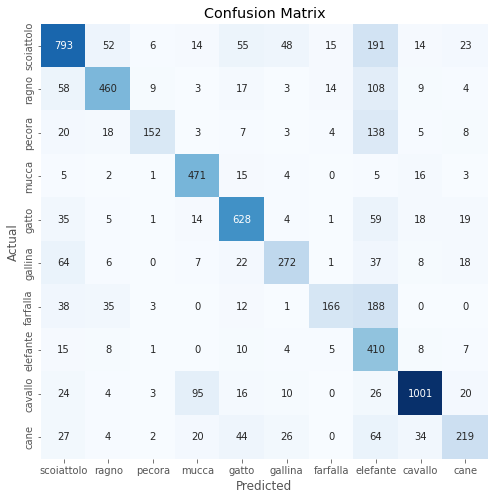

Classification Report:
----------------------
               precision    recall  f1-score   support

  scoiattolo       0.73      0.65      0.69      1211
       ragno       0.77      0.67      0.72       685
      pecora       0.85      0.42      0.57       358
       mucca       0.75      0.90      0.82       522
       gatto       0.76      0.80      0.78       784
     gallina       0.73      0.63      0.67       435
    farfalla       0.81      0.37      0.51       443
    elefante       0.33      0.88      0.48       468
     cavallo       0.90      0.83      0.87      1199
        cane       0.68      0.50      0.58       440

    accuracy                           0.70      6545
   macro avg       0.73      0.67      0.67      6545
weighted avg       0.75      0.70      0.70      6545



In [ ]:
import seaborn as sns
target_name = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
acc = model.evaluate(validation_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8,9])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8,9], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model.save('Animals10_CNN.h5')

# **VGG-16 (lr=0,0001) Callback (Fixxx)**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", mode="min", verbose=1, patience=10, min_delta=0.0001, factor=0.2)

## **Training tapi Reconnect**

In [ ]:
H2 = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator,
    #class_weight=class_weights,
    callbacks = [reduce_lr, earlystopping]
    )

Epoch 1/50
614/614 [==============================] - 5071s 8s/step - loss: 1.8235 - acc: 0.3821 - val_loss: 1.4669 - val_acc: 0.4966 - lr: 1.0000e-04
Epoch 2/50
614/614 [==============================] - 291s 473ms/step - loss: 1.3109 - acc: 0.5506 - val_loss: 1.1326 - val_acc: 0.6148 - lr: 1.0000e-04
Epoch 3/50
614/614 [==============================] - 283s 461ms/step - loss: 1.1525 - acc: 0.6102 - val_loss: 1.1197 - val_acc: 0.6232 - lr: 1.0000e-04
Epoch 4/50
614/614 [==============================] - 279s 454ms/step - loss: 1.0761 - acc: 0.6340 - val_loss: 1.0730 - val_acc: 0.6350 - lr: 1.0000e-04
Epoch 5/50
614/614 [==============================] - 275s 448ms/step - loss: 1.0286 - acc: 0.6524 - val_loss: 0.9797 - val_acc: 0.6691 - lr: 1.0000e-04
Epoch 6/50
614/614 [==============================] - 271s 441ms/step - loss: 0.9751 - acc: 0.6662 - val_loss: 0.9983 - val_acc: 0.6574 - lr: 1.0000e-04
Epoch 7/50
614/614 [==============================] - 272s 443ms/step - loss: 0.9541

In [ ]:
H2 = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator,
    #class_weight=class_weights,
    callbacks = [reduce_lr, earlystopping]
    )

Epoch 1/50
614/614 [==============================] - 4411s 7s/step - loss: 1.8483 - acc: 0.3717 - val_loss: 1.5566 - val_acc: 0.4494 - lr: 0.0010
Epoch 2/50
614/614 [==============================] - 269s 438ms/step - loss: 1.3442 - acc: 0.5370 - val_loss: 1.1950 - val_acc: 0.5841 - lr: 0.0010
Epoch 3/50
614/614 [==============================] - 263s 429ms/step - loss: 1.1925 - acc: 0.5852 - val_loss: 1.1267 - val_acc: 0.6238 - lr: 0.0010
Epoch 4/50
614/614 [==============================] - 261s 425ms/step - loss: 1.1046 - acc: 0.6226 - val_loss: 1.1971 - val_acc: 0.5908 - lr: 0.0010
Epoch 5/50
614/614 [==============================] - 258s 420ms/step - loss: 1.0517 - acc: 0.6388 - val_loss: 1.0586 - val_acc: 0.6280 - lr: 0.0010
Epoch 6/50
614/614 [==============================] - 269s 438ms/step - loss: 0.9963 - acc: 0.6569 - val_loss: 1.0490 - val_acc: 0.6425 - lr: 0.0010
Epoch 7/50
614/614 [==============================] - 270s 440ms/step - loss: 0.9652 - acc: 0.6688 - val_los

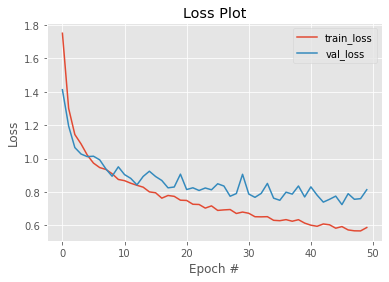

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H2.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

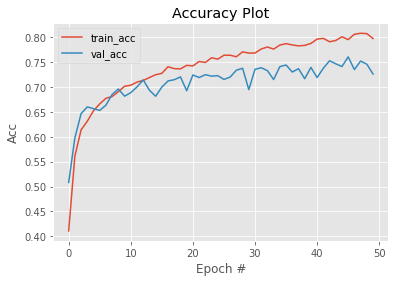

In [ ]:
plt.figure()
plt.plot(np.arange(0, 50), H2.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H2.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Accuracy: 72.41%


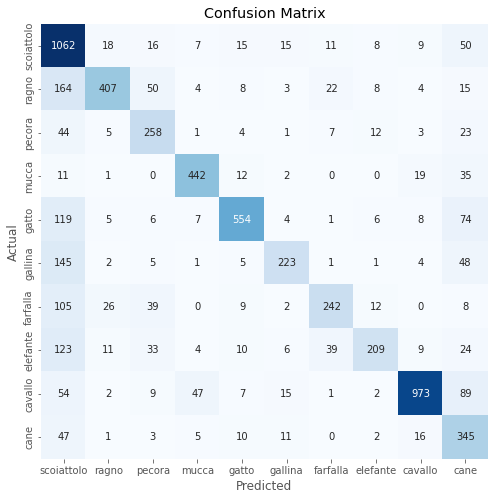

Classification Report:
----------------------
               precision    recall  f1-score   support

  scoiattolo       0.57      0.88      0.69      1211
       ragno       0.85      0.59      0.70       685
      pecora       0.62      0.72      0.66       358
       mucca       0.85      0.85      0.85       522
       gatto       0.87      0.71      0.78       784
     gallina       0.79      0.51      0.62       435
    farfalla       0.75      0.55      0.63       443
    elefante       0.80      0.45      0.57       468
     cavallo       0.93      0.81      0.87      1199
        cane       0.49      0.78      0.60       440

    accuracy                           0.72      6545
   macro avg       0.75      0.68      0.70      6545
weighted avg       0.76      0.72      0.72      6545



In [ ]:
import seaborn as sns
target_name = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
acc = model.evaluate(validation_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8,9])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8,9], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model.save('Animals10_CNN_Callback.h5')

In [ ]:
HH = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator,
    #class_weight=class_weights,
    callbacks = [reduce_lr, earlystopping]
    )

Epoch 1/50
614/614 [==============================] - 15658s 25s/step - loss: 1.8021 - acc: 0.3916 - val_loss: 1.3858 - val_acc: 0.5279 - lr: 1.0000e-04
Epoch 2/50
614/614 [==============================] - 274s 446ms/step - loss: 1.3026 - acc: 0.5559 - val_loss: 1.1907 - val_acc: 0.5887 - lr: 1.0000e-04
Epoch 3/50
614/614 [==============================] - 268s 437ms/step - loss: 1.1658 - acc: 0.6026 - val_loss: 1.0343 - val_acc: 0.6428 - lr: 1.0000e-04
Epoch 4/50
614/614 [==============================] - 267s 436ms/step - loss: 1.0764 - acc: 0.6342 - val_loss: 1.0043 - val_acc: 0.6573 - lr: 1.0000e-04
Epoch 5/50
614/614 [==============================] - 270s 440ms/step - loss: 1.0246 - acc: 0.6500 - val_loss: 1.0483 - val_acc: 0.6452 - lr: 1.0000e-04
Epoch 6/50
614/614 [==============================] - 267s 436ms/step - loss: 0.9801 - acc: 0.6684 - val_loss: 0.9095 - val_acc: 0.6958 - lr: 1.0000e-04
Epoch 7/50
614/614 [==============================] - 263s 429ms/step - loss: 0.93

In [ ]:
History = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator,
    #class_weight=class_weights,
    callbacks = [reduce_lr, earlystopping]
    )

Epoch 1/50
614/614 [==============================] - 6219s 10s/step - loss: 1.8026 - acc: 0.3936 - val_loss: 1.3882 - val_acc: 0.5335 - lr: 1.0000e-04
Epoch 2/50
614/614 [==============================] - 2434s 4s/step - loss: 1.3112 - acc: 0.5547 - val_loss: 1.1631 - val_acc: 0.6000 - lr: 1.0000e-04
Epoch 3/50
614/614 [==============================] - 2477s 4s/step - loss: 1.1537 - acc: 0.6083 - val_loss: 1.1218 - val_acc: 0.6193 - lr: 1.0000e-04
Epoch 4/50
614/614 [==============================] - 2465s 4s/step - loss: 1.0631 - acc: 0.6389 - val_loss: 1.0353 - val_acc: 0.6503 - lr: 1.0000e-04
Epoch 5/50
614/614 [==============================] - 2492s 4s/step - loss: 1.0195 - acc: 0.6525 - val_loss: 1.0059 - val_acc: 0.6558 - lr: 1.0000e-04
Epoch 6/50
614/614 [==============================] - 2508s 4s/step - loss: 0.9746 - acc: 0.6683 - val_loss: 1.0130 - val_acc: 0.6550 - lr: 1.0000e-04
Epoch 7/50
 83/614 [===>..........................] - ETA: 26:42 - loss: 0.9945 - acc: 0.6559

## **Train Fixx**

In [ ]:
history = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator,
    #class_weight=class_weights,
    callbacks = [reduce_lr, earlystopping]
    )

Epoch 1/50
614/614 [==============================] - 4554s 7s/step - loss: 1.7615 - acc: 0.4048 - val_loss: 1.4435 - val_acc: 0.5154 - lr: 1.0000e-04
Epoch 2/50
614/614 [==============================] - 269s 439ms/step - loss: 1.2797 - acc: 0.5689 - val_loss: 1.2414 - val_acc: 0.5905 - lr: 1.0000e-04
Epoch 3/50
614/614 [==============================] - 264s 429ms/step - loss: 1.1428 - acc: 0.6125 - val_loss: 1.0678 - val_acc: 0.6368 - lr: 1.0000e-04
Epoch 4/50
614/614 [==============================] - 260s 424ms/step - loss: 1.0710 - acc: 0.6353 - val_loss: 1.0860 - val_acc: 0.6246 - lr: 1.0000e-04
Epoch 5/50
614/614 [==============================] - 255s 416ms/step - loss: 1.0345 - acc: 0.6485 - val_loss: 1.0079 - val_acc: 0.6593 - lr: 1.0000e-04
Epoch 6/50
614/614 [==============================] - 276s 449ms/step - loss: 0.9733 - acc: 0.6657 - val_loss: 0.9709 - val_acc: 0.6637 - lr: 1.0000e-04
Epoch 7/50
614/614 [==============================] - 252s 410ms/step - loss: 0.9467

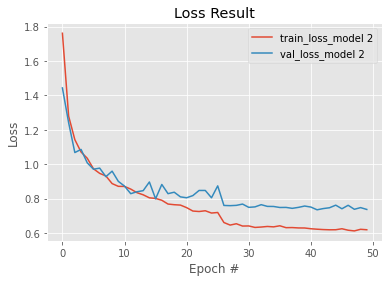

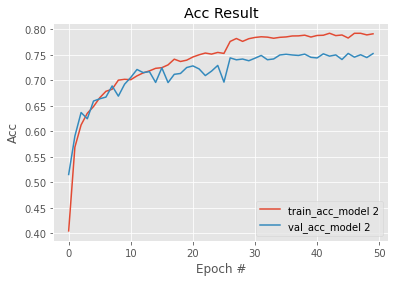

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history.history["loss"], label="train_loss_model 2")
plt.plot(np.arange(0, 50), history.history["val_loss"], label="val_loss_model 2")
plt.title("Loss Result")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), history.history["acc"], label="train_acc_model 2")
plt.plot(np.arange(0, 50), history.history["val_acc"], label="val_acc_model 2")
plt.title("Acc Result")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
model.save('model_vgg16_ML.h5')

## **Prediksi**

In [ ]:
ypred = model.predict(validation_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      1211
           1       0.74      0.76      0.75       685
           2       0.64      0.73      0.68       358
           3       0.85      0.84      0.85       522
           4       0.78      0.80      0.79       784
           5       0.73      0.63      0.67       435
           6       0.63      0.67      0.65       443
           7       0.72      0.53      0.61       468
           8       0.86      0.90      0.88      1199
           9       0.65      0.62      0.63       440

    accuracy                           0.75      6545
   macro avg       0.73      0.72      0.73      6545
weighted avg       0.75      0.75      0.75      6545



Accuracy: 74.55%


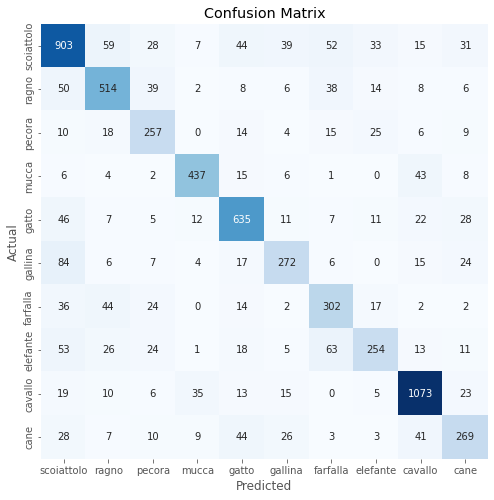

Classification Report:
----------------------
               precision    recall  f1-score   support

  scoiattolo       0.73      0.75      0.74      1211
       ragno       0.74      0.75      0.74       685
      pecora       0.64      0.72      0.68       358
       mucca       0.86      0.84      0.85       522
       gatto       0.77      0.81      0.79       784
     gallina       0.70      0.63      0.66       435
    farfalla       0.62      0.68      0.65       443
    elefante       0.70      0.54      0.61       468
     cavallo       0.87      0.89      0.88      1199
        cane       0.65      0.61      0.63       440

    accuracy                           0.75      6545
   macro avg       0.73      0.72      0.72      6545
weighted avg       0.75      0.75      0.75      6545



In [ ]:
import seaborn as sns

acc = model.evaluate(validation_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], target_names=["scoiattolo","ragno","pecora","mucca","gatto","gallina","farfalla","elefante","cavallo","cane"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=["scoiattolo","ragno","pecora","mucca","gatto","gallina","farfalla","elefante","cavallo","cane"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], labels=["scoiattolo","ragno","pecora","mucca","gatto","gallina","farfalla","elefante","cavallo","cane"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

file_val_scoiattolo = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/scoiattolo')
file_val_ragno = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/ragno')
file_val_pecora = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/pecora')
file_val_mucca = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/mucca')
file_val_gatto = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/gatto')
file_val_gallina = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/gallina')
file_val_farfalla = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/farfalla')
file_val_elefante = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/elefante')
file_val_cavallo = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/cavallo')
file_val_cane = os.path.join('/content/drive/MyDrive/ML Tugbes/model-raw-img/validation/cane')

scoiattolo_image = os.listdir(file_val_scoiattolo)
ragno_image = os.listdir(file_val_ragno)
pecora_image = os.listdir(file_val_pecora)
mucca_image = os.listdir(file_val_mucca)
gatto_image = os.listdir(file_val_gatto)
gallina_image = os.listdir(file_val_gallina)
farfalla_image = os.listdir(file_val_farfalla)
elefante_image = os.listdir(file_val_elefante)
cavallo_image = os.listdir(file_val_cavallo)
cane_image = os.listdir(file_val_cane)

fname1 = [os.path.join(file_val_scoiattolo,fname)
        for fname in scoiattolo_image[0:5]]

fname2 = [os.path.join(file_val_ragno,fname)
        for fname in ragno_image[0:5]]

fname3 = [os.path.join(file_val_pecora,fname)
        for fname in pecora_image[0:5]]

fname4 = [os.path.join(file_val_mucca,fname)
        for fname in mucca_image[0:5]]

fname5 = [os.path.join(file_val_gatto,fname)
        for fname in gatto_image[0:5]]

fname6 = [os.path.join(file_val_gallina,fname)
        for fname in gallina_image[0:5]]

fname7 = [os.path.join(file_val_farfalla,fname)
        for fname in farfalla_image[0:5]]

fname8 = [os.path.join(file_val_elefante,fname)
        for fname in elefante_image[0:5]]

fname9 = [os.path.join(file_val_cavallo,fname)
        for fname in cavallo_image[0:5]]

fname10 = [os.path.join(file_val_cane,fname)
        for fname in cane_image[0:5]]

In [ ]:
from PIL import Image
import time
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

labels = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
labels2 = ['scoiattolo','ragno','pecora','mucca','gatto','gallina','farfalla','elefante','cavallo','cane']
isian = [fname1, fname2, fname3, fname4, fname5, fname6, fname7, fname8, fname9, fname10]
input_size = (100, 100)

title = []
prediksi = []
waktu = []
akurasi = []

for x in list(range(len(labels))):
  for gambar in isian[x]:
    title.append(labels2[x])
    im = Image.open(gambar)
    X = preprocess(im, input_size)
    X = reshape([X])
    start = time.time()
    Y = model.predict(X)
    end = time.time()
    times = end-start
    prediksi.append(labels[np.argmax(Y)])
    waktu.append(times)
    akurasi.append(np.max(Y))

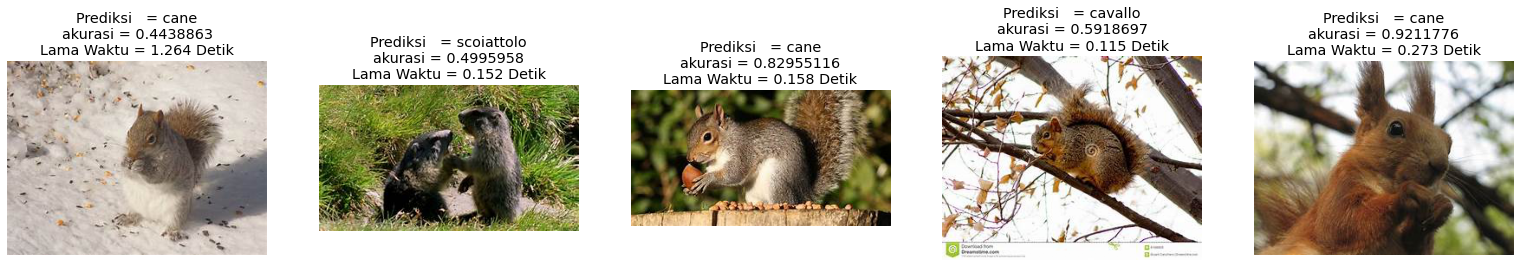

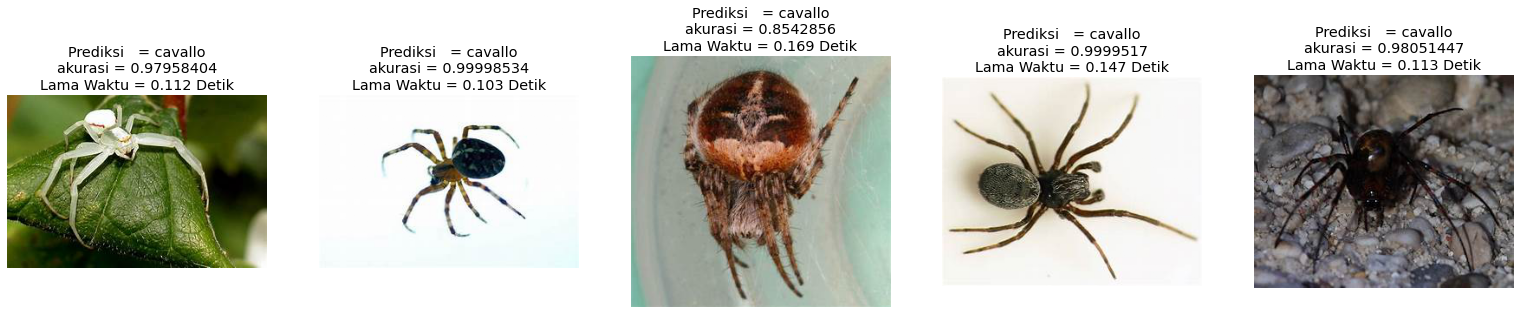

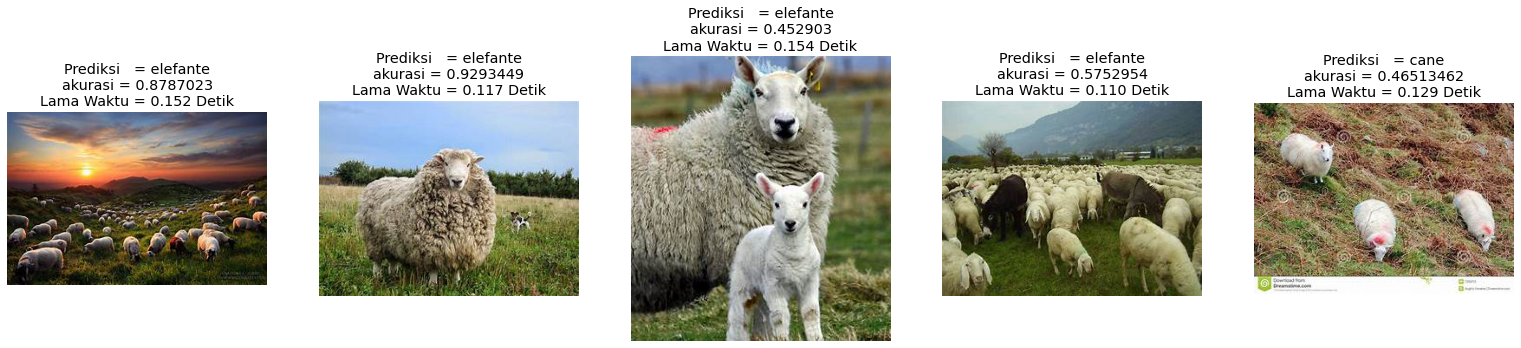

In [ ]:
xz = 0

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()

ncolu = 3
nrow = 5
fig = plt.gcf()
fig.set_size_inches(ncolu*9,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(3,5,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    judul = 'Prediksi   = ' + prediksi[xz] + '\nakurasi = '+ str(akurasi[xz]) + '\nLama Waktu = ' + '{:.3f}'.format(waktu[xz]) + ' Detik'
    xz = xz+1
    plt.title(judul)
    plt.imshow(img)
plt.show()